In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [85]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [86]:
titanic.isnull().sum()#No of rows in all columns having null values

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [87]:
titanic.nunique()#no of unique different classes in each column

,0
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,248
embarked,3
class,3
who,3


In [88]:
print(f"Dataset shape:{titanic.shape}")

Dataset shape:(891, 15)


In [89]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [90]:
titanic['age'].skew()

np.float64(0.38910778230082704)

In [91]:
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

#Since the skewness <0.5 we can go for mean otherwise we should opt for median as it is less sensitive to outliers

In [92]:
titanic['age'].isnull().sum()

np.int64(0)

In [93]:
titanic['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [94]:
titanic['embarked'].fillna('S',inplace=True)

<ipython-input-94-a54afb7a2a93>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna('S',inplace=True)


In [95]:
titanic['embarked'].isnull().sum()

np.int64(0)

In [96]:
titanic['embark_town'].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [97]:
titanic['embark_town'].fillna('Southampton',inplace=True)

<ipython-input-97-db6b23fcfe2c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embark_town'].fillna('Southampton',inplace=True)


In [98]:
titanic['embark_town'].isnull().sum()

np.int64(0)

In [100]:
titanic.drop(labels=['deck'],axis=1,inplace=True)

In [101]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [106]:
titanic_encoded=pd.get_dummies(titanic,columns=['sex','embarked','class','who','adult_male','embark_town','alive','alone'],drop_first=True)

In [108]:
titanic_encoded.replace({True:1,False:0})

<ipython-input-108-b30a87aa18eb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_encoded.replace({True:1,False:0})


,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,adult_male_True,embark_town_Queenstown,embark_town_Southampton,alive_yes,alone_True
0,0,3,22.000000,1,0,7.2500,1,0,1,0,1,1,0,1,0,1,0,0
1,1,1,38.000000,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,1,0
2,1,3,26.000000,0,0,7.9250,0,0,1,0,1,0,1,0,0,1,1,1
3,1,1,35.000000,1,0,53.1000,0,0,1,0,0,0,1,0,0,1,1,0
4,0,3,35.000000,0,0,8.0500,1,0,1,0,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1,1,0,1,0,1,0,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1,0,0,0,1,0,0,1,1,1
888,0,3,29.699118,1,2,23.4500,0,0,1,0,1,0,1,0,0,1,0,0
889,1,1,26.000000,0,0,30.0000,1,0,0,0,0,1,0,1,0,0,1,1


In [110]:
# Ensure that the result of the replace operation is assigned back to the DataFrame
titanic_encoded = titanic_encoded.replace({True: 1, False: 0})

num_cols=['survived','pclass','age','sibsp','parch','fare','sex_male','embarked_Q','embarked_S','class_Second','class_Third','who_man','who_woman','adult_male_True','embark_town_Queenstown','embark_town_Southampton','alive_yes','alone_True']
for col in num_cols:
    # Convert the column to integer type if it contains boolean values
    if titanic_encoded[col].dtype == 'bool':
        titanic_encoded[col] = titanic_encoded[col].astype(int)

    col_min = titanic_encoded[col].min()
    col_max = titanic_encoded[col].max()

    # Avoid division by zero if col_max equals col_min
    if col_max != col_min:
        titanic_encoded[col] = (titanic_encoded[col] - col_min) / (col_max - col_min)
    else:
        # If min and max are the same, all values are the same.
        # Normalizing to 0 or leaving as is depends on desired behavior.
        # Here, we'll set all values to 0 if col_min is not 0, or leave as 0 if it is.
        # Assuming min and max are 0 or 1 for dummy variables, this is appropriate.
        titanic_encoded[col] = 0


<ipython-input-110-ea17f64c945d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_encoded = titanic_encoded.replace({True: 1, False: 0})


In [111]:
titanic_encoded

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,adult_male_True,embark_town_Queenstown,embark_town_Southampton,alive_yes,alone_True
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
888,0.0,1.0,0.367921,0.125,0.333333,0.045771,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [112]:
for col in num_cols:
    mean=titanic_encoded[col].mean()
    std=titanic_encoded[col].std()
    titanic_encoded[col]=(titanic_encoded[col]-mean)/std

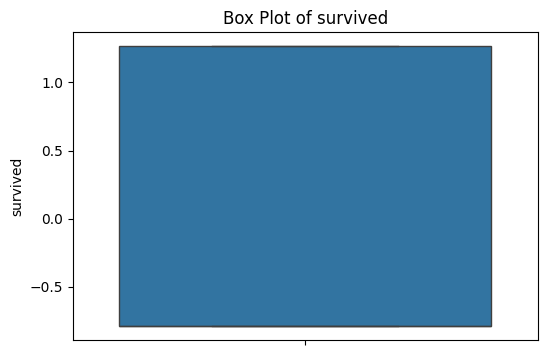

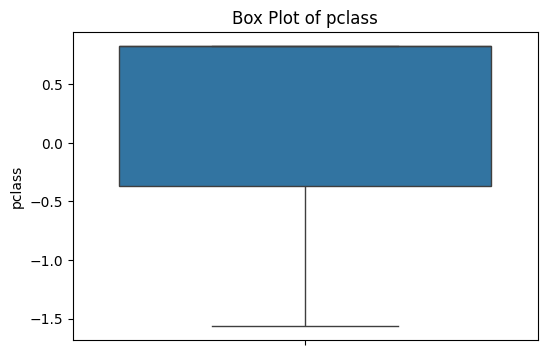

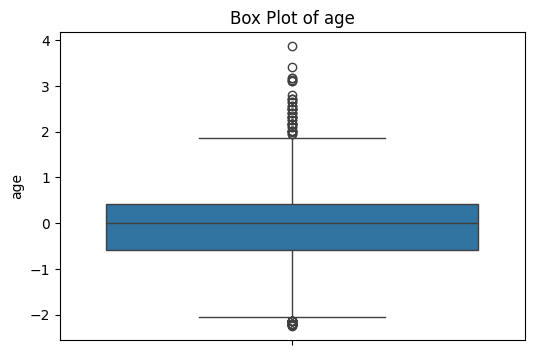

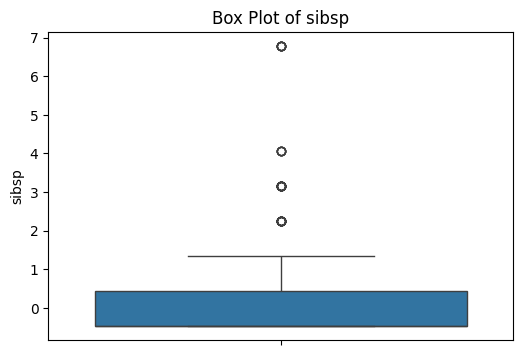

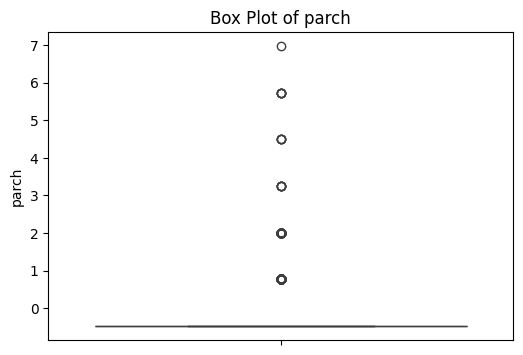

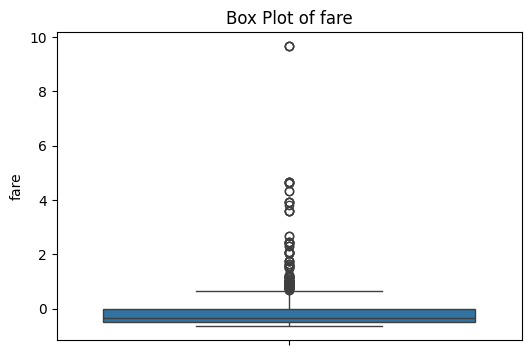

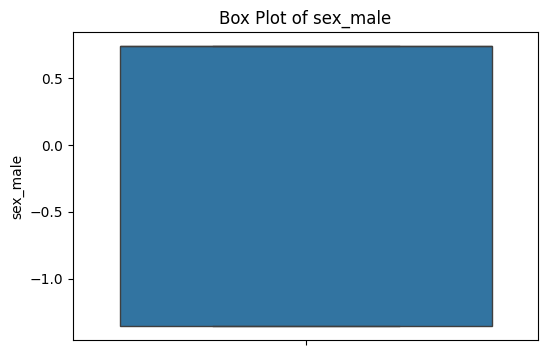

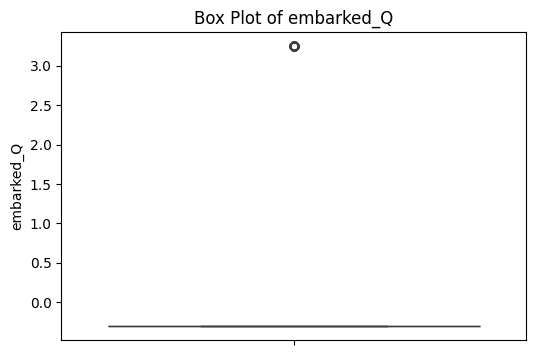

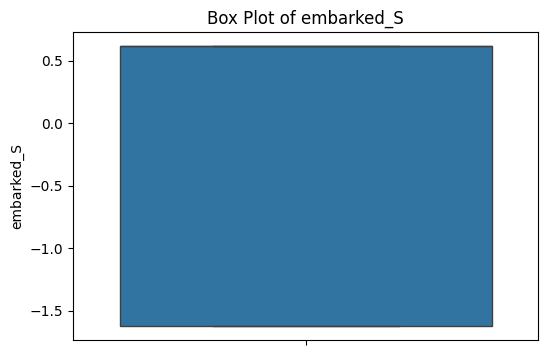

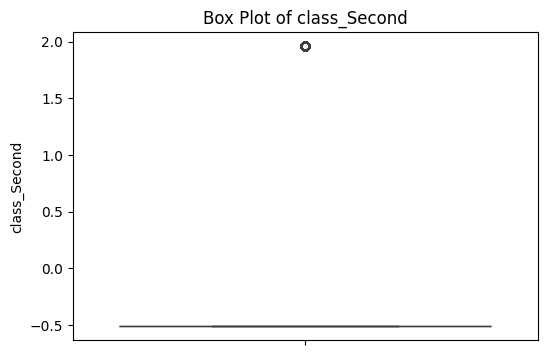

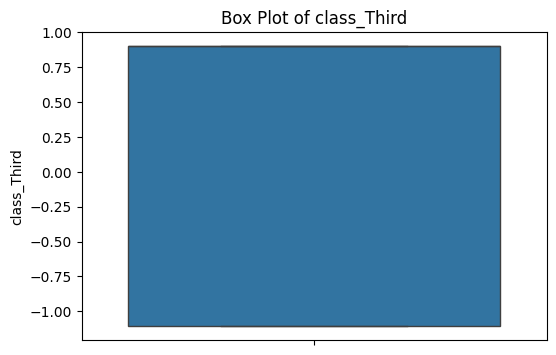

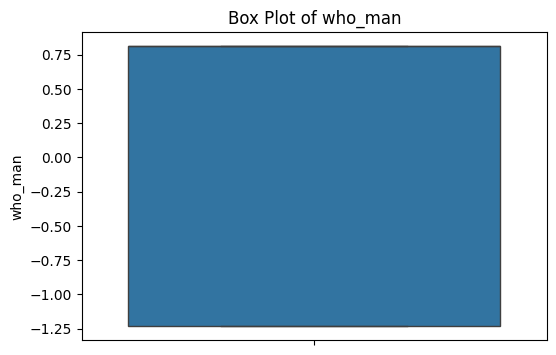

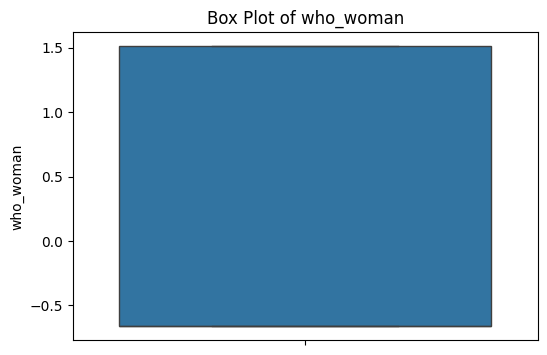

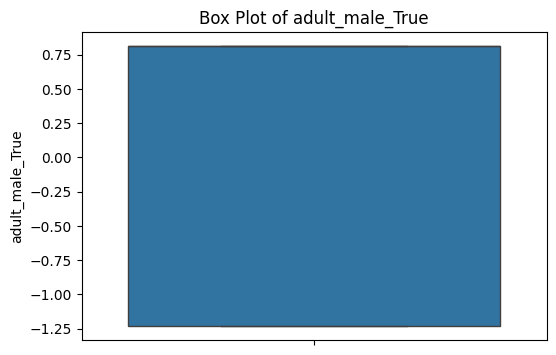

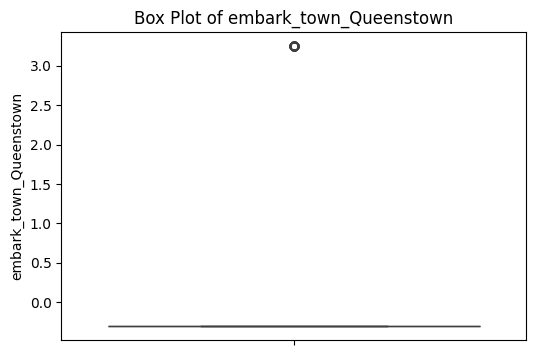

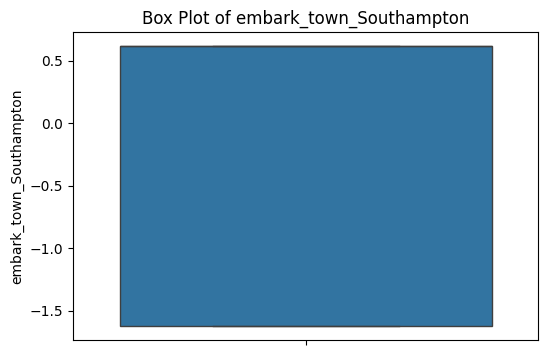

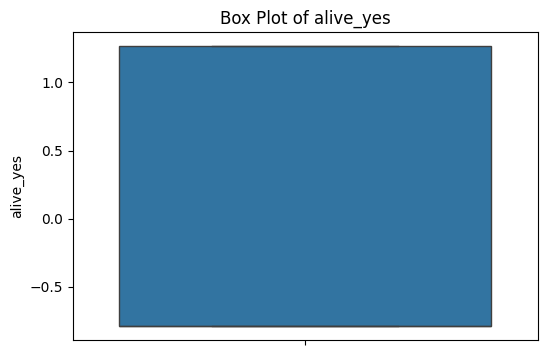

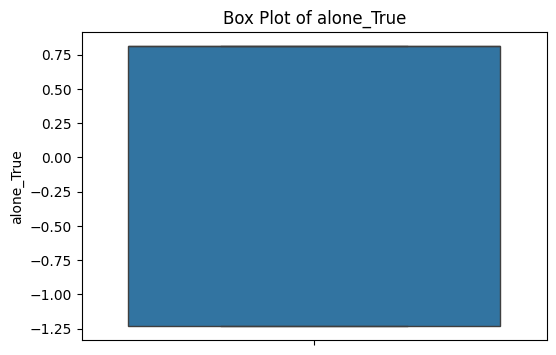

In [114]:
# Creating box plots for numerical columns
for col in num_cols:
    plt.figure(figsize=(6, 4)) # Set figure size for better readability
    sns.boxplot(y=titanic_encoded[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

Original shape of age: (891, 18)
Shape after removing outliers in age: (825, 18)
Original shape of fare: (825, 18)
Shape after removing outliers in fare: (718, 18)

Final dataset shape after removing outliers: (718, 18)


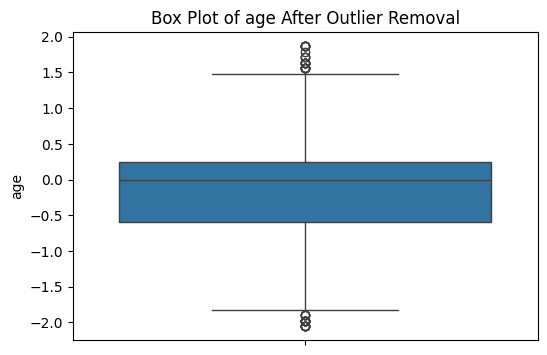

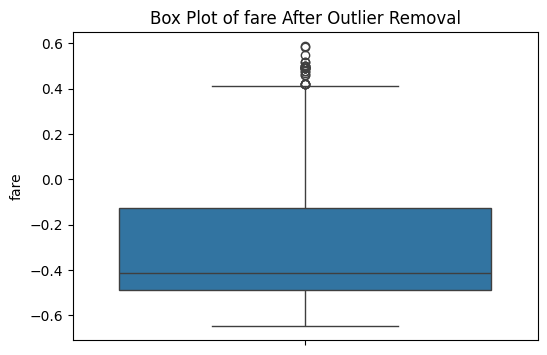

In [116]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep rows where the column value is within the bounds
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"Original shape of {column}: {df.shape}")
    print(f"Shape after removing outliers in {column}: {df_cleaned.shape}")
    return df_cleaned

# Identify columns that might have outliers based on the boxplots and domain knowledge
# For the Titanic dataset, 'age' and 'fare' are likely candidates for outliers.
# Other columns are mostly categorical or derived. We should be cautious about removing
# 'outliers' from columns like 'survived', 'pclass', etc. as they represent important categories.
# We will apply outlier removal to 'age' and 'fare'.
cols_to_check_outliers = ['age', 'fare']

# Apply outlier removal for each specified column
titanic_cleaned = titanic_encoded.copy() # Work on a copy to compare
for col in cols_to_check_outliers:
    if col in titanic_cleaned.columns:
      titanic_cleaned = remove_outliers_iqr(titanic_cleaned, col)
    else:
      print(f"Column '{col}' not found in the DataFrame.")

# Display the shape of the DataFrame after removing outliers
print(f"\nFinal dataset shape after removing outliers: {titanic_cleaned.shape}")

# You can now work with the 'titanic_cleaned' DataFrame which has potential outliers removed
# You can optionally visualize the boxplots again for the cleaned data
for col in cols_to_check_outliers:
    if col in titanic_cleaned.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=titanic_cleaned[col])
        plt.title(f'Box Plot of {col} After Outlier Removal')
        plt.ylabel(col)
        plt.show()
